# An E-Commerce company wants to find the factors influence the sales of the mobile Phone.

# Use your EDA techniques and statistical hypothesis techniques and find the factors which influences the sales of the mobile phones.

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.stats as stm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
df=pd.read_csv("D:\STDS-Assignment 3\ECommerce _company_mobile sales.csv")
df.head()

brand           model base_color processor screen_size  ROM  RAM  \
0  Apple       iPhone SE      Black     Water  Very Small   64    2   
1  Apple  iPhone 12 Mini        Red   Ceramic       Small   64    4   
2  Apple       iPhone SE        Red     Water  Very Small   64    2   
3  Apple       iPhone XR     Others       iOS      Medium   64    3   
4  Apple       iPhone 12        Red   Ceramic      Medium  128    4   

   display_size  num_rear_camera  num_front_camera  battery_capacity  ratings  \
0           4.7                1                 1              1800      4.5   
1           5.4                2                 1              2815      4.5   
2           4.7                1                 1              1800      4.5   
3           6.1                1                 1              2942      4.6   
4           6.1                2                 1              2815      4.6   

   num_of_ratings  sales_price  discount_percent   sales  
0           38645        32999              0.17  127.52  
1             244        57149              0.04    1.39  
2           38645        32999              0.17  127.52  
3            5366        42999              0.10   23.07  
4             745        69149              0.02    5.15

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

In [19]:
df['sales']=df['sales'].astype('int')

In [5]:
df.columns

Index(['brand', 'model', 'base_color', 'processor', 'screen_size', 'ROM',
       'RAM', 'display_size', 'num_rear_camera', 'num_front_camera',
       'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price',
       'discount_percent', 'sales'],
      dtype='object')

### The data doesn't have duplicate values or null values , we can proceed to EDA 

In [20]:
df.groupby('brand')['sales'].describe()

count       mean         std  min  25%   50%   75%    max
brand                                                             
Apple     56.0  18.946429   30.982939  1.0  1.0   5.0  23.5  127.0
Poco      56.0  43.071429   65.118872  1.0  6.5  33.5  50.0  427.0
Realme   138.0  30.659420   41.550163  0.0  5.0  15.5  30.0  167.0
Samsung  119.0  10.218487   21.901227  0.0  0.0   1.0   9.0   98.0
Xiaomi    61.0  60.180328  112.809058  0.0  1.0   6.0  82.0  550.0

<AxesSubplot:xlabel='sales', ylabel='Count'>

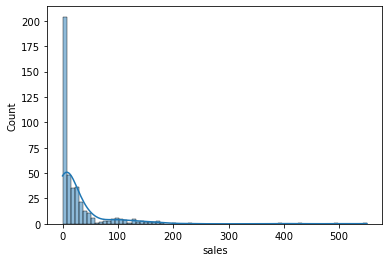

In [21]:
sns.histplot(x='sales',data=df,kde=True)

The sales data is right skewed 
The price range of mobile phones selling the most is between 

In [22]:
df.sales.value_counts()

0      77
1      40
4      25
5      23
23     15
       ..
41      1
78      1
26      1
158     1
493     1
Name: sales, Length: 80, dtype: int64

In [23]:
df.model.value_counts()

iPhone XR            18
iPhone 12            17
iPhone 12 Mini       16
GT Master Edition     9
X3                    9
                     ..
Galaxy A7             1
Galaxy Fold 2         1
Galaxy M11            1
6i                    1
Redmi 5               1
Name: model, Length: 119, dtype: int64

In [24]:
df.display_size.value_counts()

6.5    164
6.4     64
6.7     62
6.1     43
6.3     22
5.4     16
6.6     14
6.2     12
5.8      6
5.5      6
6.0      5
7.6      4
4.7      4
5.7      3
6.9      2
5.2      2
5.6      1
Name: display_size, dtype: int64

<AxesSubplot:xlabel='battery_capacity', ylabel='Count'>

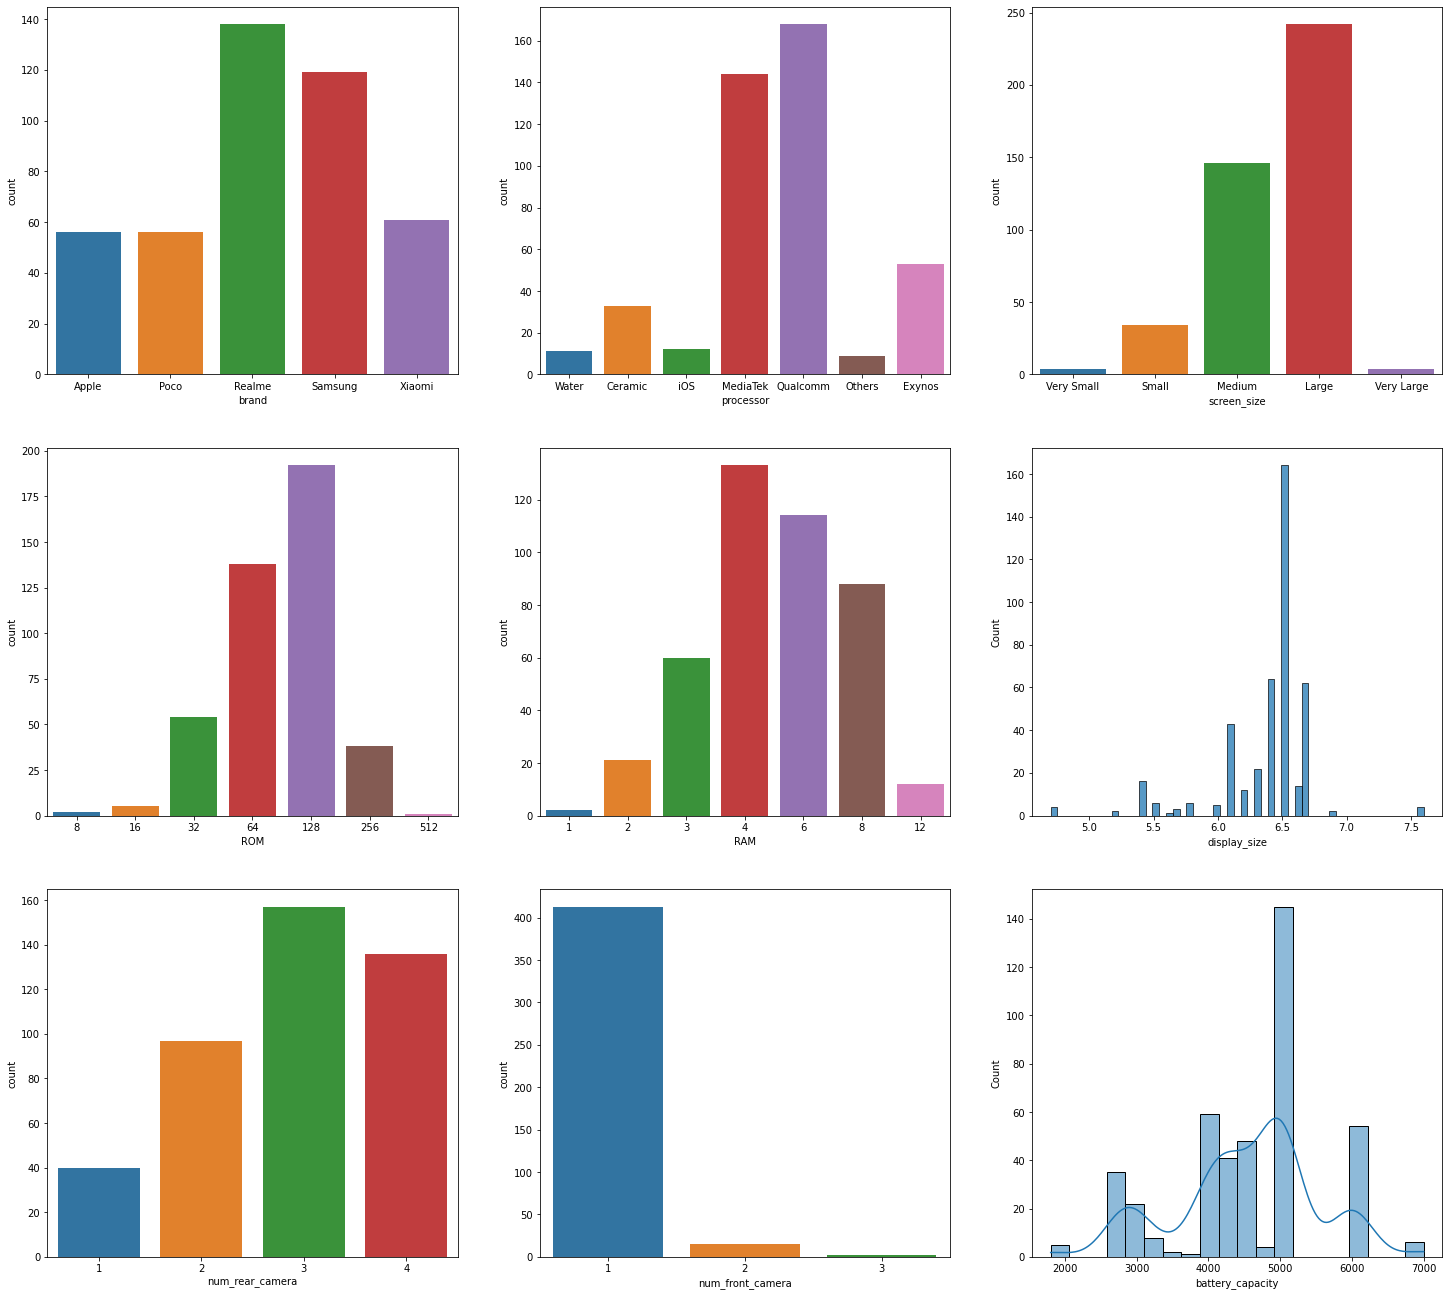

In [25]:
plt.figure(figsize=(25,23))
plt.subplot(3,3,1)
sns.countplot(x='brand',data=df)
plt.subplot(3,3,2)
sns.countplot(x='processor',data=df)
plt.subplot(3,3,3)
sns.countplot(x='screen_size',data=df)
plt.subplot(3,3,4)
sns.countplot(x='ROM',data=df)
plt.subplot(3,3,5)
sns.countplot(x='RAM',data=df)
plt.subplot(3,3,6)
sns.histplot(df.display_size)
plt.subplot(3,3,7)
sns.countplot(x='num_rear_camera',data=df)
plt.subplot(3,3,8)
sns.countplot(x='num_front_camera',data=df)
plt.subplot(3,3,9)
sns.histplot(x='battery_capacity',data=df,kde=True)


processor
Ceramic     AxesSubplot(0.125,0.125;0.775x0.755)
Exynos      AxesSubplot(0.125,0.125;0.775x0.755)
MediaTek    AxesSubplot(0.125,0.125;0.775x0.755)
Others      AxesSubplot(0.125,0.125;0.775x0.755)
Qualcomm    AxesSubplot(0.125,0.125;0.775x0.755)
Water       AxesSubplot(0.125,0.125;0.775x0.755)
iOS         AxesSubplot(0.125,0.125;0.775x0.755)
Name: sales, dtype: object

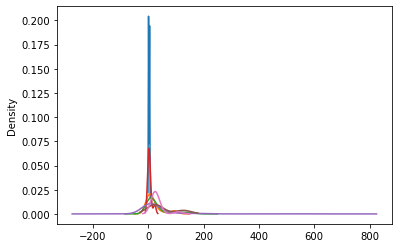

In [131]:
df.groupby('processor')['sales'].plot(kind='kde')

### Inference

#### Does brand value affect the sales of the mobile phones? verify the claim at 5% level of significance

In [26]:
a=df[df.brand=='Apple']['sales']
p=df[df.brand=='Poco']['sales']
r=df[df.brand=='Realme']['sales']
s=df[df.brand=='Samsung']['sales']
x=df[df.brand=='Xiaomi']['sales']

In [27]:
#test for normality
st.shapiro(a)

ShapiroResult(statistic=0.5588996410369873, pvalue=1.0245626395899432e-11)

since p value<alpha(0.05)

we conclude that the brand value is not following normal

we can proceed for kruskar wallis test

In [28]:
#variance test
st.levene(a,p,r,s,x)

LeveneResult(statistic=8.79312886924167, pvalue=7.917601526069105e-07)

since p value<alpha(0.05)

hence we conclude that variance of the brand are not same

H0:population median sales of all brand is same
    
H1:population median sales of any two brand is different 

In [29]:
st.kruskal(a,p,r,s,x)

KruskalResult(statistic=79.5008665283793, pvalue=2.2219711239156483e-16)

since p value<alpha(0.05) -->reject H0

since we conclude that the population median sales of any two brand is different 

In [76]:
pairwise_tukeyhsd(df.sales,df.brand).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

#### Does base color affect the mobile phone sales ? verify the claim at 5% level of significance 

In [41]:
df.groupby('base_color')['sales'].describe()

count       mean         std  min   25%   50%     75%    max
base_color                                                              
Black       112.0  32.616071   71.320018  0.0  1.00   7.0   25.00  493.0
Blue        117.0  25.940171   39.029452  0.0  2.00  11.0   30.00  204.0
Bronze        5.0   6.000000    8.396428  0.0  0.00   1.0   10.00   19.0
Gold         11.0  99.000000  162.906108  0.0  2.50  31.0  134.50  550.0
Gray         20.0  20.450000   39.637137  0.0  0.00   5.0   17.75  167.0
Green        24.0  29.625000   43.057911  0.0  1.00  14.5   34.00  167.0
Others       28.0  22.500000   21.507105  0.0  3.00  20.0   33.50   79.0
Purple        5.0   2.800000    2.049390  1.0  1.00   2.0    5.00    5.0
Red          21.0  48.047619   97.577393  0.0  1.00   5.0   42.00  427.0
Silver       32.0  25.625000   40.545275  0.0  3.75  10.5   22.75  142.0
White        44.0  22.272727   33.588733  0.0  0.00   5.0   25.75  127.0
Yellow       11.0  19.181818   17.331002  0.0  4.50  18.0   25.00   51.0

In [56]:
bk=df[df.base_color=='Black']['sales']
bl=df[df.base_color=='Blue']['sales']
br=df[df.base_color=='Bronze']['sales']
go=df[df.base_color=='Gold']['sales']
gr=df[df.base_color=='Grey']['sales']
grn=df[df.base_color=='Green']['sales']
ot=df[df.base_color=='Others']['sales']
pu=df[df.base_color=='Purple']['sales']
re=df[df.base_color=='Red']['sales']
sil=df[df.base_color=='Silver']['sales']
whi=df[df.base_color=='White']['sales']
ye=df[df.base_color=='Yellow']['sales']

In [52]:
#test of normality
st.shapiro(bk)

ShapiroResult(statistic=0.4880584478378296, pvalue=5.219019974286973e-18)

we conclude that the black color doesn't follow normal 

we can proceed with non parametric test kruskal wallis test

H0:the population median base color for all mobile sales is same
    
H1:the population median base color for atleast two mobile sales is different

In [49]:
model=ols('sales~base_color',data=df).fit()
anova_table_df=anova_lm(model)
anova_table_df

df        sum_sq      mean_sq         F    PR(>F)
base_color   11.0  7.619269e+04  6926.607989  2.090669  0.019946
Residual    418.0  1.384878e+06  3313.105893       NaN       NaN

since p value<alpha(0.05) -->reject H0

hence we conclude that the population median base color for atleast two mobile sales is different

In [77]:
pairwise_tukeyhsd(df.sales,df.base_color).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

#### Does processor type affect the sales of mobiles? verify the claim at 5% level of significance 

In [62]:
df.processor.value_counts()

Qualcomm    168
MediaTek    144
Exynos       53
Ceramic      33
iOS          12
Water        11
Others        9
Name: processor, dtype: int64

In [64]:
q=df[df.processor=='Qualcomm']['sales']
m=df[df.processor=='MediaTek']['sales']
e=df[df.processor=='Exynos']['sales']
c=df[df.processor=='Ceramic']['sales']
i=df[df.processor=='iOS']['sales']
w=df[df.processor=='Water']['sales']
o=df[df.processor=='Others']['sales']

In [65]:
#test of normality
st.shapiro(q)

ShapiroResult(statistic=0.46470290422439575, pvalue=2.596572146463218e-22)

we conclude that the qualcomm processor doesn't follow normal

we can proceed with non parametric test kruskal wallis test

H0:population median of processor in all mobiles are same
    
H1:population median of processor in any two mobiles are different

In [66]:
st.kruskal(q,m,e,c,i,w,o)

KruskalResult(statistic=42.28010432887401, pvalue=1.6188416354288243e-07)

In [67]:
model_1=ols('sales~processor',data=df).fit()
anova1=anova_lm(model_1)
anova1

df        sum_sq      mean_sq         F    PR(>F)
processor    6.0  4.457080e+04  7428.466413  2.218313  0.040467
Residual   423.0  1.416500e+06  3348.700125       NaN       NaN

since p value<alpha(0.05) --> reject H0

hence we conclude that population median of processor in any two mobiles are different

In [78]:
pairwise_tukeyhsd(df.sales,df.processor).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

#### Does Screen size influence the sales of mobile phone?verify the laim at 5% level of significance 

In [68]:
df.screen_size.value_counts()

Large         242
Medium        146
Small          34
Very Small      4
Very Large      4
Name: screen_size, dtype: int64

In [69]:
l=df[df.screen_size=='Large']['sales']
m=df[df.screen_size=='Medium']['sales']
s=df[df.screen_size=='Small']['sales']
vs=df[df.screen_size=='Very Small']['sales']
vl=df[df.screen_size=='Very Large']['sales']

In [70]:
st.shapiro(l)

ShapiroResult(statistic=0.5476562976837158, pvalue=1.3363405300285487e-24)

the screen size does't follow normal

we can proceed with kruskal walis test

H0:population median sales of mobiles with screen size are same
    
H1:population median sales of any two mobiles with screen size are different 

In [73]:
model2=ols('sales~screen_size',data=df).fit()
anova2=anova_lm(model2)
anova2

df        sum_sq       mean_sq         F    PR(>F)
screen_size    4.0  4.797580e+04  11993.949619  3.607279  0.006617
Residual     425.0  1.413095e+06   3324.929771       NaN       NaN

since p value< alpha(0.05) --> reject H0

hence we conclude that population median sales of any two mobiles with screen size are different

In [79]:
pairwise_tukeyhsd(df.sales,df.screen_size).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

#### Does the num_of_rating influence the sales of mobile phone? verift the claim at 5% level of significance

In [107]:
df.groupby('num_of_ratings')['sales'].describe()

count        mean       std    min    25%    50%    75%    max
num_of_ratings                                                                
4                 3.0    0.000000  0.000000    0.0    0.0    0.0    0.0    0.0
6                 2.0    0.000000  0.000000    0.0    0.0    0.0    0.0    0.0
7                 6.0    0.000000  0.000000    0.0    0.0    0.0    0.0    0.0
8                 4.0    0.000000  0.000000    0.0    0.0    0.0    0.0    0.0
10                1.0    0.000000       NaN    0.0    0.0    0.0    0.0    0.0
...               ...         ...       ...    ...    ...    ...    ...    ...
226996            3.0  150.666667  6.350853  147.0  147.0  147.0  152.5  158.0
267028            1.0  427.000000       NaN  427.0  427.0  427.0  427.0  427.0
357064            1.0  392.000000       NaN  392.0  392.0  392.0  392.0  392.0
470905            1.0  493.000000       NaN  493.0  493.0  493.0  493.0  493.0
642373            1.0  550.000000       NaN  550.0  550.0  550.0  550.0  550.0

[175 rows x 8 columns]

In [108]:
no_r=df.num_of_ratings
sa=df.sales

In [109]:
st.levene(no_r,sa)

LeveneResult(statistic=71.16070360564967, pvalue=1.3873449338146834e-16)

p value < alpha(0.05)

hence we conclude that the population variance of number_of_ratings and sales are different

we use mannwhitneyu test

H0:population total mean of number of ratings and sales is same
    
H1:population total mean of number of ratings and sales is different

In [112]:
st.mannwhitneyu(no_r,sa)

MannwhitneyuResult(statistic=178360.5, pvalue=4.078995262030491e-123)

p value<alpha(0.05) -->reject H0

hence we conclude that population total mean of number of ratings and sales is same

#### Does discount influence the sales ?verify the claim at 5% level of significance

H0:population median discount influence sales 
    
H1:population median discount does not influence sales 

In [116]:
d=df.discount_percent
s=df.sales

In [117]:
st.levene(d,s)

LeveneResult(statistic=101.23565551328487, pvalue=1.3780762128656168e-22)

since p value<alpha

We use non parametric test mannwhitneyu

In [119]:
st.mannwhitneyu(d,s)

MannwhitneyuResult(statistic=33110.0, pvalue=9.448804347084936e-60)

since p value<alpha(0.05) --> reject H0

hence we conclude that population median discount does not influence sales 

#### Does the price of mobile influence sales? verify the clim at 5% level

H0:the population median price of mobile influence sales
    
H1:the population median price of mobile doesn't influence sales

In [127]:
p=df.sales_price
sa=df.sales

In [128]:
st.levene(p,sa)

LeveneResult(statistic=194.46680595637312, pvalue=5.472563325156245e-40)

since p value<alpha(0.05) --> reject H0
    
we use mannwhitneyu test

In [129]:
st.mannwhitneyu(p,sa)

MannwhitneyuResult(statistic=184900.0, pvalue=2.9500325025909336e-142)

since p value<alpha(0.05) reject H0

hence we conclude that population median discount influence sales 